## Segmentação de Imagens
<img src="https://dl.fbaipublicfiles.com/detectron2/Detectron2-Logo-Horz.png" width="500"> <br>


Trabalho Final IA - Equipe: Gabriel Barreto e Carlos Gabriel

Importar Depedencias

In [1]:
!pip install pyyaml==5.4.1
!pip install torch==2.0.1+cu118 torchvision==0.15.2+cu118 torchaudio==2.0.2+cu118 -f https://download.pytorch.org/whl/torch_stable.html

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.1/175.1 kB 4.4 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for pyyaml: filename=PyYAML-5.4.1-cp310-cp310-linux_x86_64.whl size=45658 sha256=02ea2954f211f1cfe2bd9b3170db5f19fddbaf7d20be4fb07067cd359a58ad6f
  Stored in directory: /root/.cache/pip/wheels/c7/0d/22/696ee92245ad710f506eee79bb05c740d8abccd3ecdb778683
Successfully built pyyaml
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 6.0
    Uninstalling PyYAML-6.0:
      Successfully uninstalled PyYAML-6.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.pytorch.org/whl/torch_stable.html


Conferir Versão do Pytorch e se o cuda está ativo

In [2]:
import torch
print(torch.__version__)
print(torch.cuda.is_available())

2.0.1+cu118
True


In [3]:
import torchaudio
print(torchaudio.__version__)

2.0.2+cu118


Instalar detectron como depedencia

In [5]:
!pip install git+https://github.com/facebookresearch/detectron2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/detectron2 to /tmp/pip-req-build-gdid4tz8
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2 /tmp/pip-req-build-gdid4tz8
  Resolved https://github.com/facebookresearch/detectron2 to commit 94113be6e12db36b8c7601e13747587f19ec92fe
  Preparing metadata (setup.py) ... done


importar detectron e referencias

In [6]:
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog,DatasetCatalog

import cv2
from google.colab.patches import cv2_imshow

## Rodar Modelo com Imagem
Carregar Imagem

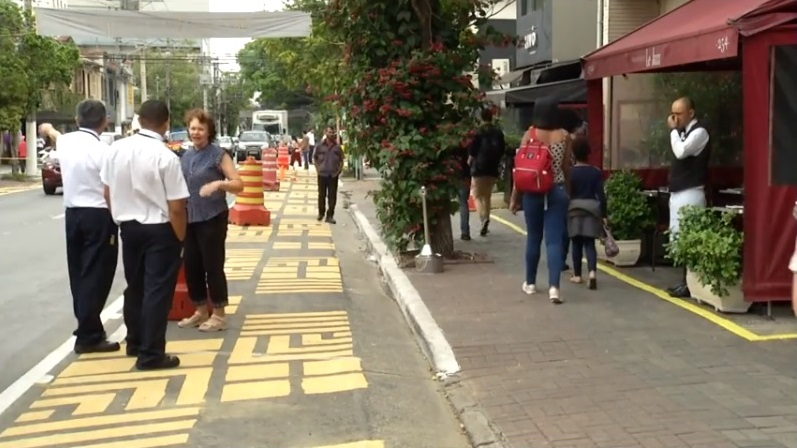

In [7]:
image = cv2.imread('./imagemteste.jpg')
cv2_imshow(image)

Configurar Modelo de Detecção

In [8]:
cfg = get_cfg()
#models for object detection
# cfg.merge_from_file(model_zoo.get_config_file("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml"))
# cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Detection/faster_rcnn_X_101_32x8d_FPN_3x.yaml")

#models for object segmentation
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml"))
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x.yaml")

cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.6

Passar Imagem para o Modelo fazer a predição

In [9]:
predictor = DefaultPredictor(cfg)
outputs = predictor(image)

[06/19 22:14:00 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from https://dl.fbaipublicfiles.com/detectron2/COCO-InstanceSegmentation/mask_rcnn_X_101_32x8d_FPN_3x/139653917/model_final_2d9806.pkl ...


model_final_2d9806.pkl: 431MB [00:04, 87.9MB/s]                           
/usr/local/lib/python3.10/dist-packages/torch/functional.py:504: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3483.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


Vizualizar Resultado

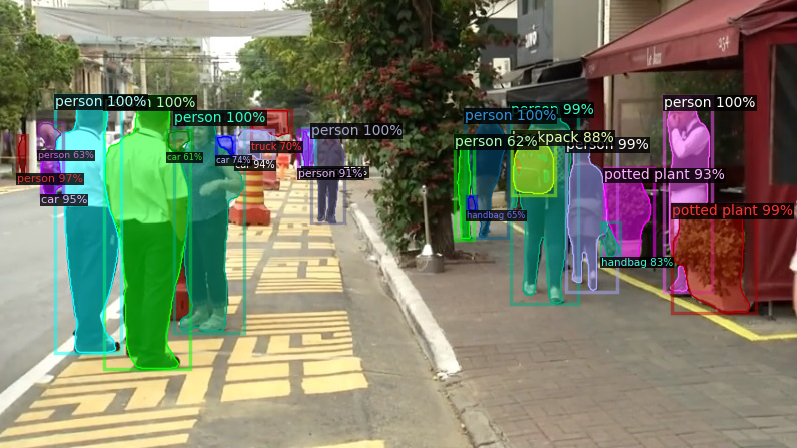

In [10]:
vizu = Visualizer(image[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]))
output = vizu.draw_instance_predictions(outputs["instances"].to("cpu"))
cv2_imshow(output.get_image()[:,:,::-1])